# Phase 2 Project - Team Iron

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem
- We work for Iron Realty, a real estate agency that specializes in providing homeowners with the tools necessary to sell their homes at their maximum potential.
- We want our sellers to get the highest sale price possible for their house.
- Sellers tell us their target sale price, and we determine if its realistic, or what they need to do to get to that price! Or, even better - if they can ask for more!

Type Markdown and LaTeX:  𝛼2

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

## Visual Studio
 - Importing two functions.
  - The ut function evaluates the amount of error between model's predication and the actual values for both train and test set
  - The rf function allows testing for the dependent variable with multiple variables or a single one.

In [2]:
# Created and imported from visual studio.
#import utilities as ut
#import regressionfunc as rf

## Files
 - Locating and opening the usable data in our project folder.

In [3]:
!ls

CONTRIBUTING.md
Data exploration (2).ipynb
Data exploration.ipynb
FinalNotebook.ipynb
Iron (1).ipynb
Iron (2).ipynb
IronNotebook.ipynb
IronPhase2.ipynb
LICENSE.md
Phase2Project
Price_Bath.png
Price_Bed.png
Price_Built.png
Price_Comp.png
Price_Floors.png
Price_Living.png
Price_PSQFT.png
Price_Year.png
Project2DataVisualization
Project2Template.ipynb
README.md
Untitled.ipynb
Untitled1.ipynb
ap.png
data
halfway-there.gif
pairplor.png
price_floors_fit.png
price_sqft_living_fit.png
student.ipynb


In [4]:
df = pd.read_csv('Phase2Project/data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Data Understanding

- Where did the data come from, and how do they relate to the data analysis questions? 
    - Our real estate agency is based in King County, Washington, USA. We sourced relevant historic data related to past home sales in our county that we can use to develop a model that gives us realistic estimates of what sells.
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable? The price the home sold for is our target variable based on our business problem.
- What are the properties of the variables you intend to use?

## Data Exploration

 - Check out our data.
 - Look to see if there are any abnormalities.
 - Discover what columns might be worth investigating further.


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Exploring Categorical Variables
 - Checking for things such as:
  - The count of different cells in a column.
  - Unique cells within a column, etc.

In [6]:
# Explore Categorical Columns

cat_cols = [c for c in df. columns if df[c].dtype == 'object']
df[cat_cols].describe()

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


### Columns
 - What data is contained in the cells.

In [7]:
# This column has a few variables that make it top heavy.

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Waterfront Variable
 - Categorical Variable, is there anthing interesting with it?

In [8]:
# This is interesting because there are so few Yes cells compared to no.

df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
df['waterfront'].describe()

count     19221
unique        2
top          NO
freq      19075
Name: waterfront, dtype: object

### Bedrooms
 - Bedroom count is significant.
 - It can really be understood when looking at the quartiles and standard deviation.

In [10]:
# A lot of the houses have between 2 and 5 bedrooms.
# This would indicate the data has a lot of single family homes.

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

### Creating New Columns
 - Here, we calculate new columns based on independent variables that can be combined.

In [12]:
df['Bath_SQFT'] = df['sqft_living'] / df['bathrooms']
df['Bedrooms_SQFT'] = df['sqft_living'] / df['bedrooms']
df['BathroomsPerBedrooms'] = df['bathrooms'] / df['bedrooms']
df['Perc_Liv_Space_Above'] = df['sqft_above'] / df['sqft_living']
df['LS_Per_FL'] = df['sqft_living'] / df['floors']
df['LivSp_Per_Lot'] = df['sqft_living'] / df['sqft_lot']

df.round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,47.51,-122.26,1340,5650,1180.00,393.33,0.33,1.00,1180.0,0.21
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,47.72,-122.32,1690,7639,1142.22,856.67,0.75,0.84,1285.0,0.35
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,47.74,-122.23,2720,8062,770.00,385.00,0.50,1.00,770.0,0.08
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,47.52,-122.39,1360,5000,653.33,490.00,0.75,0.54,1960.0,0.39
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,47.62,-122.04,1800,7503,840.00,560.00,0.67,1.00,1680.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,47.70,-122.35,1530,1509,612.00,510.00,0.83,1.00,510.0,1.35
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,47.51,-122.36,1830,7200,924.00,577.50,0.62,1.00,1155.0,0.40
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,47.59,-122.30,1020,2007,1360.00,510.00,0.38,1.00,510.0,0.76
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,47.53,-122.07,1410,1287,640.00,533.33,0.83,1.00,800.0,0.67


### Discovering the Type of Data
 - What do the columns contain?
 - What Dtype are they?
 - Are there any NaN values, empty cells or null values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21597 non-null  int64  
 1   date                  21597 non-null  object 
 2   price                 21597 non-null  float64
 3   bedrooms              21597 non-null  int64  
 4   bathrooms             21597 non-null  float64
 5   sqft_living           21597 non-null  int64  
 6   sqft_lot              21597 non-null  int64  
 7   floors                21597 non-null  float64
 8   waterfront            19221 non-null  object 
 9   view                  21534 non-null  object 
 10  condition             21597 non-null  object 
 11  grade                 21597 non-null  object 
 12  sqft_above            21597 non-null  int64  
 13  sqft_basement         21597 non-null  object 
 14  yr_built              21597 non-null  int64  
 15  yr_renovated       

In [14]:
df.isna().sum()

id                         0
date                       0
price                      0
bedrooms                   0
bathrooms                  0
sqft_living                0
sqft_lot                   0
floors                     0
waterfront              2376
view                      63
condition                  0
grade                      0
sqft_above                 0
sqft_basement              0
yr_built                   0
yr_renovated            3842
zipcode                    0
lat                        0
long                       0
sqft_living15              0
sqft_lot15                 0
Bath_SQFT                  0
Bedrooms_SQFT              0
BathroomsPerBedrooms       0
Perc_Liv_Space_Above       0
LS_Per_FL                  0
LivSp_Per_Lot              0
dtype: int64

## Train-Test Split
 - Splitting the data in two so that we have a train set that can be tested against.
 - This exercise is so that the data can be tested against how well the machine learned it.
 - Dropping id column because it is not necessary.

In [15]:
X = df.drop(columns= ['id', 'price'])
y = df['price']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [16]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot
count,15117.000000,15117.000000,15117.000000,1.511700e+04,15117.000000,15117.000000,15117.000000,12418.000000,15117.00000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000
mean,3.376001,2.119948,2087.040617,1.516938e+04,1.496362,1793.521598,1971.090825,82.781285,98078.17907,47.560889,-122.213841,1990.058610,12854.456043,1006.229010,619.483881,0.641515,0.875116,1488.580876,0.324761
std,0.909173,0.770233,922.643607,4.106372e+04,0.540947,830.319679,29.339641,398.004042,53.58806,0.138218,0.141493,686.935438,27118.169894,292.287663,216.546748,0.211264,0.171193,658.552556,0.271378
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,265.454545,200.000000,0.125000,0.333333,273.333333,0.000787
25%,3.000000,1.750000,1430.000000,5.070000e+03,1.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471800,-122.329000,1490.000000,5102.000000,800.000000,470.000000,0.500000,0.724719,1026.666667,0.155566
50%,3.000000,2.250000,1912.000000,7.623000e+03,1.500000,1570.000000,1975.000000,0.000000,98065.00000,47.573200,-122.231000,1840.000000,7625.000000,971.428571,577.500000,0.625000,1.000000,1370.000000,0.247126
75%,4.000000,2.500000,2560.000000,1.075400e+04,2.000000,2230.000000,1997.000000,0.000000,98118.00000,47.678300,-122.125000,2360.000000,10088.000000,1167.272727,726.666667,0.750000,1.000000,1820.000000,0.408428
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,4600.000000,3000.000000,2.500000,1.000000,9640.000000,4.653846


X_test:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot
count,6480.000000,6480.000000,6480.000000,6.480000e+03,6480.000000,6480.000000,6480.000000,5337.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,3.366667,2.106211,2064.647840,1.493618e+04,1.488812,1777.108025,1970.787037,85.627319,98077.421759,47.558235,-122.214313,1978.599228,12533.925463,1004.430419,615.031304,0.639697,0.876081,1478.151389,0.321409
std,0.965111,0.766037,907.309873,4.221816e+04,0.536726,821.705862,29.459273,404.460305,53.338089,0.139321,0.138922,681.221783,27636.376894,296.312713,214.364663,0.212561,0.170558,644.460251,0.261532
min,1.000000,0.750000,410.000000,6.090000e+02,1.000000,410.000000,1900.000000,0.000000,98001.000000,47.162200,-122.515000,670.000000,659.000000,322.857143,49.090909,0.053030,0.392566,253.333333,0.000610
25%,3.000000,1.500000,1420.000000,5.001000e+03,1.000000,1190.000000,1951.000000,0.000000,98032.750000,47.469275,-122.327000,1480.000000,5068.250000,800.000000,470.000000,0.500000,0.729730,1020.000000,0.159062
50%,3.000000,2.250000,1910.000000,7.590000e+03,1.500000,1550.000000,1975.000000,0.000000,98065.000000,47.569600,-122.229000,1830.000000,7610.000000,964.000000,572.500000,0.625000,1.000000,1370.000000,0.248649
75%,4.000000,2.500000,2510.000000,1.050000e+04,2.000000,2190.000000,1996.000000,0.000000,98117.000000,47.677525,-122.126000,2360.000000,10075.750000,1164.000000,715.000000,0.750000,1.000000,1820.000000,0.404764
max,33.000000,7.750000,10040.000000,1.164794e+06,3.500000,8860.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,858132.000000,3908.571429,3420.000000,2.500000,1.000000,6930.000000,4.055829


## Baseline Understanding

In order to establish a baseline understanding of our training data:
 - We predict the mean value of our training data
 - Make a list, using this mean, that is the size of our training data. 

In [17]:
# Define function that evaluate the amount of error between model's predication and the actual values for both train and test set
def evaluate(y_tr, tr_preds, y_te, te_preds):
    '''
    Evaluate the amount of error between model's predication and the actual values for both train and test set
    
    Inputs:
    y_tr = array like, actual values for 'price' for my train dataset
    y_te = array like, actaul values for 'price' for my test dataset
    tr_preds = array like, predicted values for 'price' for my train dataset
    te_preds = array like, predicted values for 'price' for my test dataset
    '''
    
    print(f'Train R2: {r2_score(y_tr, tr_preds)}')
    print(f'Test R2: {r2_score(y_te, te_preds)}')
    print('****')
    print(f'Train RMSE: {mean_squared_error(y_tr, tr_preds,squared = False)}')
    print(f'Test RMSE: {mean_squared_error(y_te, te_preds,squared=False)}')
    print('****')
    print(f'Train MAE: {mean_absolute_error(y_tr, tr_preds)}')
    print(f'Test MAE: {mean_absolute_error(y_te, te_preds)}')
    
    # Calculate Residual
    train_residuals = y_tr-tr_preds
    test_residuals = y_te-te_preds
    
    # Display Scatter Plot for Residual
    plt.scatter(tr_preds, train_residuals, label='Train')
    plt.scatter(te_preds, test_residuals, label='Test')
    plt.axhline(y=0, color='red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.show()

In [18]:
train_target_mean = y_train.mean()
train_target_mean

542036.6354435404

In [19]:
baseline_train_preds = [train_target_mean] * len(y_train)

baseline_test_preds = [train_target_mean] * len(y_test)

baseline_train_preds

[542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,


Train R2: 0.0
Test R2: -0.00025364584938625256
****
Train RMSE: 368717.15420135023
Test RMSE: 364186.90115591313
****
Train MAE: 235842.03996570347
Test MAE: 231347.94071899675


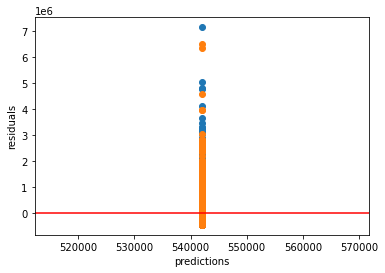

In [20]:
evaluate(y_train,baseline_train_preds,y_test,baseline_test_preds)

# Data Preperation
 - Take a look at the train sample.
 - Check for any statistical anomalies or significance.
 - Which varaibles dropped or created.
 - Missing values and outlier solutions.

In [21]:
train_df = pd.concat([X_train, y_train], axis = 1)
#sns.pairplot(train_df)

<AxesSubplot:>

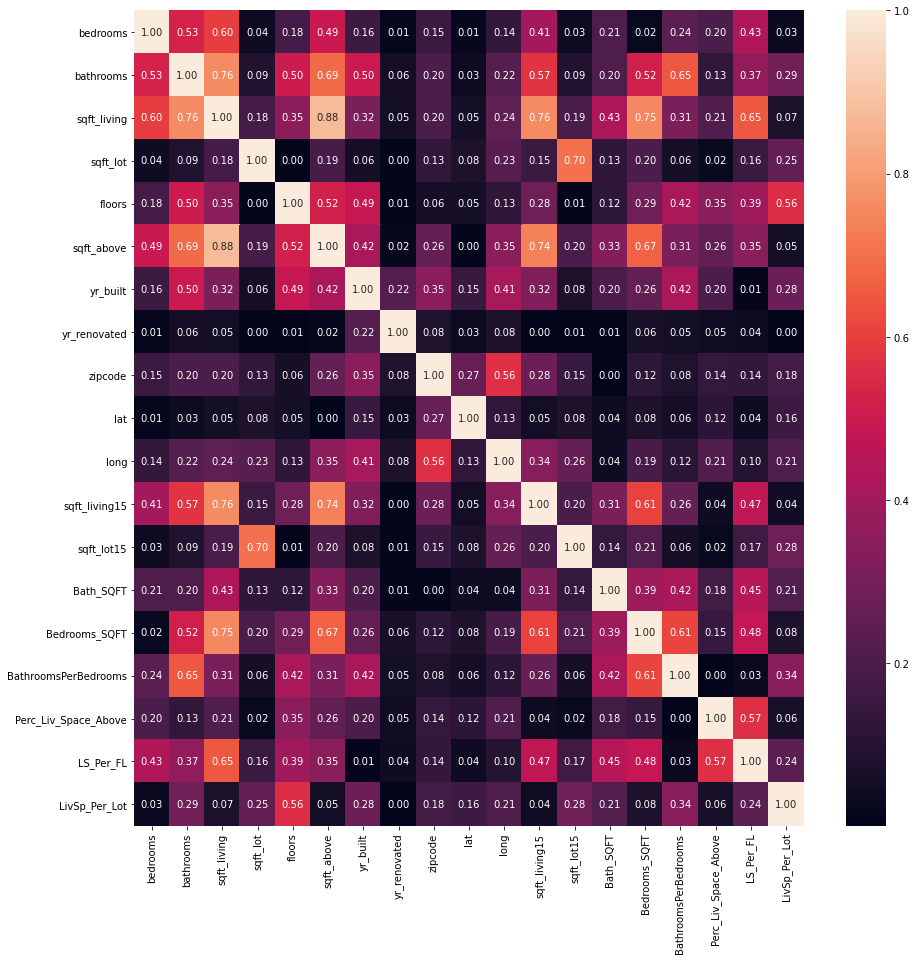

In [22]:
# Data visualization of multicollinearity.
plt.figure(figsize = (15,15))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

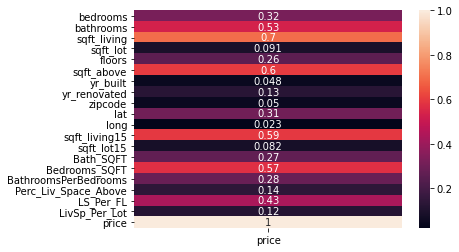

In [23]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

### Copying the Data Frame

In [24]:
train_df2 = train_df.copy()

In [25]:
train_df2.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot,price
count,15117.000000,15117.000000,15117.000000,1.511700e+04,15117.000000,15117.000000,15117.000000,12418.000000,15117.00000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,1.511700e+04
mean,3.376001,2.119948,2087.040617,1.516938e+04,1.496362,1793.521598,1971.090825,82.781285,98078.17907,47.560889,-122.213841,1990.058610,12854.456043,1006.229010,619.483881,0.641515,0.875116,1488.580876,0.324761,5.420366e+05
std,0.909173,0.770233,922.643607,4.106372e+04,0.540947,830.319679,29.339641,398.004042,53.58806,0.138218,0.141493,686.935438,27118.169894,292.287663,216.546748,0.211264,0.171193,658.552556,0.271378,3.687294e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,265.454545,200.000000,0.125000,0.333333,273.333333,0.000787,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.070000e+03,1.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471800,-122.329000,1490.000000,5102.000000,800.000000,470.000000,0.500000,0.724719,1026.666667,0.155566,3.240000e+05
50%,3.000000,2.250000,1912.000000,7.623000e+03,1.500000,1570.000000,1975.000000,0.000000,98065.00000,47.573200,-122.231000,1840.000000,7625.000000,971.428571,577.500000,0.625000,1.000000,1370.000000,0.247126,4.500000e+05
75%,4.000000,2.500000,2560.000000,1.075400e+04,2.000000,2230.000000,1997.000000,0.000000,98118.00000,47.678300,-122.125000,2360.000000,10088.000000,1167.272727,726.666667,0.750000,1.000000,1820.000000,0.408428,6.455000e+05
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,4600.000000,3000.000000,2.500000,1.000000,9640.000000,4.653846,7.700000e+06


### Dropping Columns
 - Getting rid of statistically insignificant data.

In [26]:
# Drop waterfront.
train_df2['waterfront'].value_counts()

NO     13364
YES      103
Name: waterfront, dtype: int64

In [27]:
# Drop view.
train_df2['view'].value_counts()

NONE         13610
AVERAGE        648
GOOD           356
FAIR           230
EXCELLENT      229
Name: view, dtype: int64

In [28]:
# Drop yr_renovated.
train_df2['yr_renovated'].value_counts()

0.0       11903
2014.0       45
2005.0       24
2007.0       23
2003.0       22
          ...  
1950.0        1
1974.0        1
1971.0        1
1978.0        1
1951.0        1
Name: yr_renovated, Length: 66, dtype: int64

## Enter reasoning for dropping columns here.

In [29]:
train_df2 = train_df2.drop(columns=['waterfront', 'view', 'yr_renovated'])
train_df2.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot,price
753,8/28/2014,2,2.50,2380,6600,1.0,Average,8 Good,2380,0.0,...,-122.020,1870,6600,952.000000,1190.000000,1.250000,1.0,2380.0,0.360606,699800.0
1418,4/15/2015,4,3.75,3190,17186,2.0,Average,10 Very Good,3190,0.0,...,-122.246,2290,13496,850.666667,797.500000,0.937500,1.0,1595.0,0.185616,1700000.0
8178,9/3/2014,3,2.50,1730,6930,2.0,Average,8 Good,1730,0.0,...,-122.308,1780,6930,692.000000,576.666667,0.833333,1.0,865.0,0.249639,258000.0
2254,11/12/2014,4,2.00,1870,8750,1.0,Average,7 Average,1870,0.0,...,-122.001,1770,8207,935.000000,467.500000,0.500000,1.0,1870.0,0.213714,245000.0
4063,2/19/2015,8,3.00,2850,12714,1.0,Average,7 Average,2850,0.0,...,-122.205,1480,4942,950.000000,356.250000,0.375000,1.0,2850.0,0.224162,373000.0


In [30]:
train_df2 = train_df2.drop(columns=['grade'])
train_df2.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot,price
753,8/28/2014,2,2.50,2380,6600,1.0,Average,2380,0.0,2010,...,-122.020,1870,6600,952.000000,1190.000000,1.250000,1.0,2380.0,0.360606,699800.0
1418,4/15/2015,4,3.75,3190,17186,2.0,Average,3190,0.0,1999,...,-122.246,2290,13496,850.666667,797.500000,0.937500,1.0,1595.0,0.185616,1700000.0
8178,9/3/2014,3,2.50,1730,6930,2.0,Average,1730,0.0,1994,...,-122.308,1780,6930,692.000000,576.666667,0.833333,1.0,865.0,0.249639,258000.0
2254,11/12/2014,4,2.00,1870,8750,1.0,Average,1870,0.0,1977,...,-122.001,1770,8207,935.000000,467.500000,0.500000,1.0,1870.0,0.213714,245000.0
4063,2/19/2015,8,3.00,2850,12714,1.0,Average,2850,0.0,1959,...,-122.205,1480,4942,950.000000,356.250000,0.375000,1.0,2850.0,0.224162,373000.0


In [31]:
# Conditioning categorical value to numerical.
condition_replace = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}

train_df2["condition"].replace(condition_replace, inplace=True)

In [32]:
train_df2.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot,price
count,15117.000000,15117.000000,15117.000000,1.511700e+04,15117.000000,15117.000000,15117.000000,15117.000000,15117.00000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,15117.000000,1.511700e+04
mean,3.376001,2.119948,2087.040617,1.516938e+04,1.496362,2.409208,1793.521598,1971.090825,98078.17907,47.560889,-122.213841,1990.058610,12854.456043,1006.229010,619.483881,0.641515,0.875116,1488.580876,0.324761,5.420366e+05
std,0.909173,0.770233,922.643607,4.106372e+04,0.540947,0.650820,830.319679,29.339641,53.58806,0.138218,0.141493,686.935438,27118.169894,292.287663,216.546748,0.211264,0.171193,658.552556,0.271378,3.687294e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000,1900.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,265.454545,200.000000,0.125000,0.333333,273.333333,0.000787,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.070000e+03,1.000000,2.000000,1200.000000,1952.000000,98033.00000,47.471800,-122.329000,1490.000000,5102.000000,800.000000,470.000000,0.500000,0.724719,1026.666667,0.155566,3.240000e+05
50%,3.000000,2.250000,1912.000000,7.623000e+03,1.500000,2.000000,1570.000000,1975.000000,98065.00000,47.573200,-122.231000,1840.000000,7625.000000,971.428571,577.500000,0.625000,1.000000,1370.000000,0.247126,4.500000e+05
75%,4.000000,2.500000,2560.000000,1.075400e+04,2.000000,3.000000,2230.000000,1997.000000,98118.00000,47.678300,-122.125000,2360.000000,10088.000000,1167.272727,726.666667,0.750000,1.000000,1820.000000,0.408428,6.455000e+05
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,9410.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,4600.000000,3000.000000,2.500000,1.000000,9640.000000,4.653846,7.700000e+06


## Normalizing the Data.
 - Normalizing the data.
 - Cleaning data up by reducing outliers.

In [33]:
#sns.pairplot(train_df2)

In [34]:
# Normalization
train_df2['log_livsplot'] = np.log(train_df2['LivSp_Per_Lot'])
train_df2['log_sqft_lot'] = np.log(train_df2['sqft_lot'])
train_df2['log_price'] = np.log(train_df2['price'])
train_df2['log_bath_sqft'] = np.log(train_df2['Bath_SQFT'])
train_df2['log_bed_sqft'] = np.log(train_df2['Bedrooms_SQFT'])
train_df2 = train_df2.drop(['price', 'Bedrooms_SQFT', 'sqft_lot', 'Bath_SQFT', 'LivSp_Per_Lot'], axis = 1)

In [35]:
# Dropping outliers
train_df2 = train_df2.loc[train_df2['log_sqft_lot'] <= train_df2['log_sqft_lot'].mean() + 3 * train_df2['log_sqft_lot'].std()]
train_df2 = train_df2.loc[train_df2['log_sqft_lot'] >= train_df2['log_sqft_lot'].mean() - 3 * train_df2['log_sqft_lot'].std()]
train_df2 = train_df2.loc[train_df2['log_price'] <= train_df2['log_price'].mean() + 3 * train_df2['log_price'].std()]
train_df2 = train_df2.loc[train_df2['log_price'] >= train_df2['log_price'].mean() - 3 * train_df2['log_price'].std()]
train_df2 = train_df2.loc[train_df2['log_bath_sqft'] <= train_df2['log_bath_sqft'].mean() + 3 * train_df2['log_bath_sqft'].std()]
train_df2 = train_df2.loc[train_df2['log_bath_sqft'] >= train_df2['log_bath_sqft'].mean() - 3 * train_df2['log_bath_sqft'].std()]
train_df2 = train_df2.loc[train_df2['log_bed_sqft'] <= train_df2['log_bed_sqft'].mean() + 3 * train_df2['log_bed_sqft'].std()]
train_df2 = train_df2.loc[train_df2['log_bed_sqft'] >= train_df2['log_bed_sqft'].mean() - 3 * train_df2['log_bed_sqft'].std()]
train_df2 = train_df2.loc[train_df2['log_livsplot'] <= train_df2['log_livsplot'].mean() + 3 * train_df2['log_livsplot'].std()]
train_df2 = train_df2.loc[train_df2['log_livsplot'] >= train_df2['log_livsplot'].mean() - 3 * train_df2['log_livsplot'].std()]


train_df2.describe()

,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,log_livsplot,log_sqft_lot,log_price,log_bath_sqft,log_bed_sqft
count,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000,14473.000000
mean,3.378014,2.104522,2051.055897,1.492400,2.413045,1762.818490,1970.874525,98079.013888,47.562324,-122.217710,1970.300214,9912.090168,0.636068,0.874623,1471.299621,-1.368394,8.911499,13.034640,6.868084,6.362749
std,0.897946,0.741939,848.492020,0.540648,0.649489,777.032698,29.345152,53.822964,0.137638,0.138003,665.265261,13506.135899,0.203533,0.171671,628.371562,0.730266,0.757827,0.500938,0.274101,0.309493
min,1.000000,0.500000,370.000000,1.000000,0.000000,370.000000,1900.000000,98001.000000,47.155900,-122.509000,399.000000,651.000000,0.166667,0.333333,280.000000,-3.675634,6.558198,11.561716,6.033429,5.473670
25%,3.000000,1.750000,1430.000000,1.000000,2.000000,1190.000000,1951.000000,98033.000000,47.474500,-122.330000,1480.000000,5083.000000,0.500000,0.722628,1025.000000,-1.820432,8.518193,12.676076,6.684612,6.145615
50%,3.000000,2.250000,1900.000000,1.500000,2.000000,1560.000000,1974.000000,98070.000000,47.574400,-122.237000,1830.000000,7530.000000,0.625000,1.000000,1360.000000,-1.382380,8.922658,13.015286,6.872868,6.351467
75%,4.000000,2.500000,2530.000000,2.000000,3.000000,2180.000000,1997.000000,98118.000000,47.679300,-122.130000,2340.000000,9800.000000,0.750000,1.000000,1800.000000,-0.886732,9.232591,13.361380,7.056175,6.569949
max,11.000000,6.750000,7480.000000,3.500000,4.000000,6070.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000,2.000000,1.000000,5774.000000,0.829163,11.686189,14.626441,7.714231,7.306531


 - We can assess Multicollinearity of our data set by looking at the correlation values on a heatmap.

<AxesSubplot:>

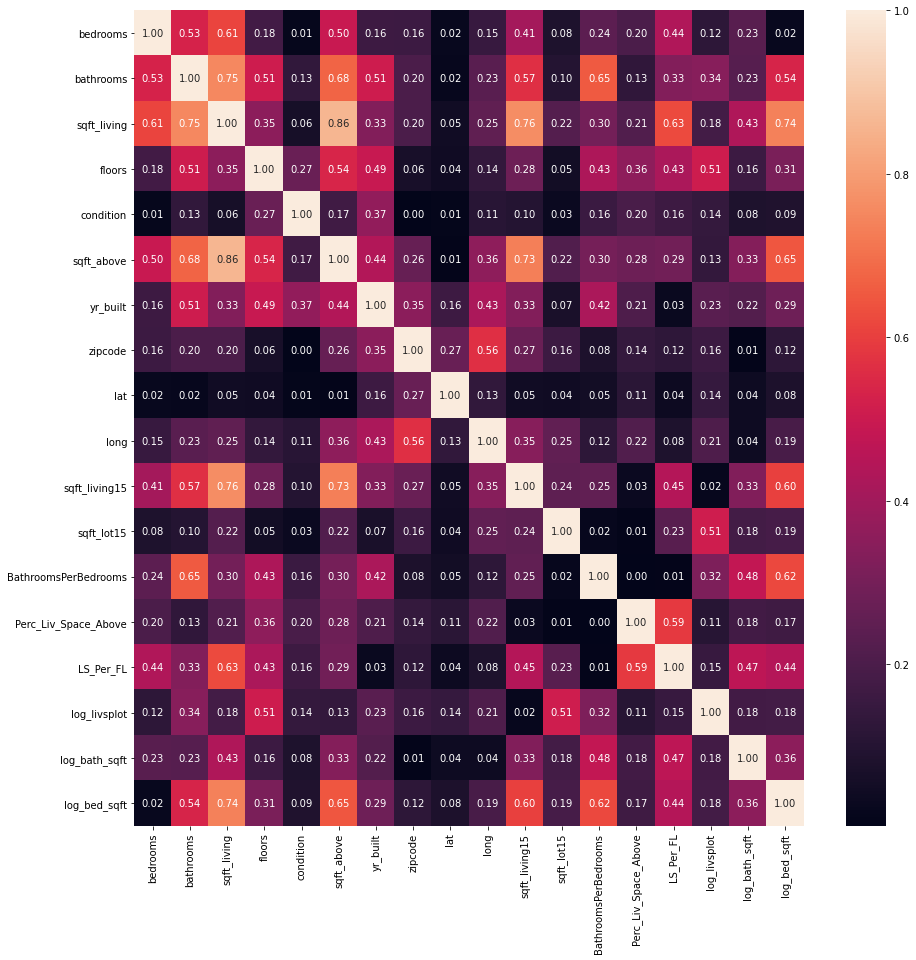

In [36]:
# Searching for multicollinearity.

X_train = train_df2.drop(columns=['log_price', 'log_sqft_lot'])
plt.figure(figsize = (15,15))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

## Multicollinearity
 - Dropping columns based on multicollinearity.

In [37]:
train_df2.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'BathroomsPerBedrooms',
       'Perc_Liv_Space_Above', 'LS_Per_FL', 'log_livsplot', 'log_sqft_lot',
       'log_price', 'log_bath_sqft', 'log_bed_sqft'],
      dtype='object')

In [38]:
X_train = train_df2.drop(['sqft_basement', 'date', 'log_price', 'bedrooms', 'bathrooms', 'sqft_above',
                         'BathroomsPerBedrooms', 'floors', 'LS_Per_FL', 'zipcode', 'sqft_living15', 'sqft_lot15',
                        'sqft_living', 'log_sqft_lot'], axis=1)

In [39]:
y_train = train_df2['log_price']

In [40]:
X_train.head()

,condition,yr_built,lat,long,Perc_Liv_Space_Above,log_livsplot,log_bath_sqft,log_bed_sqft
753,2,2010,47.7170,-122.020,1.0,-1.019969,6.858565,7.081709
1418,2,1999,47.5115,-122.246,1.0,-1.684074,6.746020,6.681482
8178,2,1994,47.2621,-122.308,1.0,-1.387738,6.539586,6.357264
2254,2,1977,47.1985,-122.001,1.0,-1.543115,6.840547,6.147399
4063,2,1959,47.4859,-122.205,1.0,-1.495385,6.856462,5.875633


<AxesSubplot:>

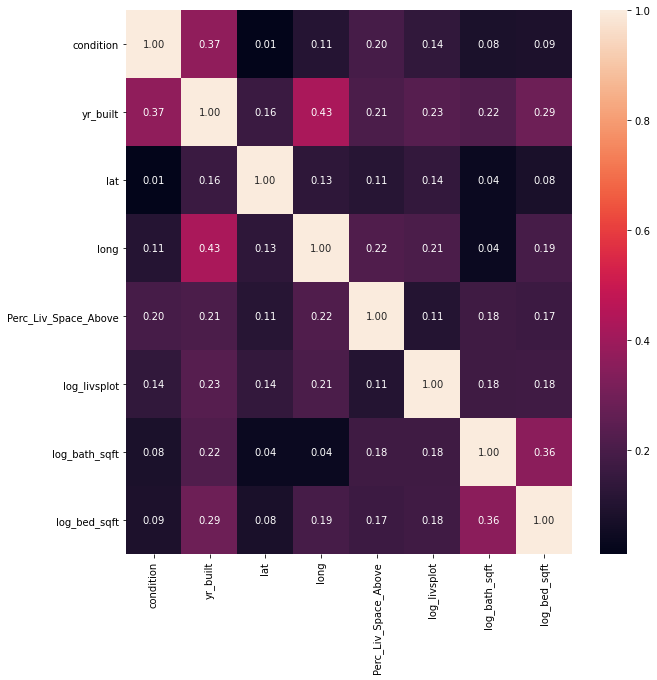

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

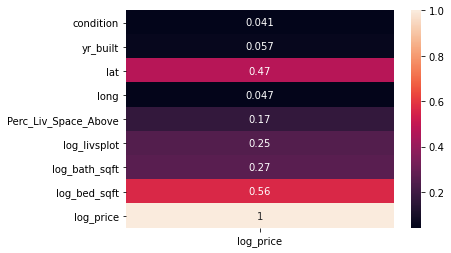

In [42]:
new_train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(new_train_df.corr()[['log_price']].abs(),annot=True)

In [43]:
def fit_n_run(xtr, ytr):
    '''
    This function:
    1) defines the X_train and X_test
    2) runs fits and runs the model for the variable input with the y_train
    3) defines the predictors of the test and train set based on the model created
    4) returns model summary 
    Input:
    var - variable in form of str (single model), or the list of variable in form of str (multi)
    
    Output:
    Model Summary, Evaluation of error and r2 score
    '''
    #xte = X_test[var]
    model = sm.OLS(ytr, sm.add_constant(xtr)).fit()
    trpreds = model.predict(sm.add_constant(xtr))
    #tepreds = model.predict(sm.add_constant(xte))
    print(model.summary())
    return trpreds

## Model 1.0

In [44]:
fit_n_run(X_train['log_bed_sqft'], y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     6757.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:07   Log-Likelihood:                -7758.1
No. Observations:               14473   AIC:                         1.552e+04
Df Residuals:                   14471   BIC:                         1.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.2243      0.071    102.084   

753      13.691184
1418     13.325703
8178     13.029632
2254     12.837986
4063     12.589813
           ...    
11964    13.261472
21575    13.196785
5390     12.654737
860      12.648749
15795    13.191827
Length: 14473, dtype: float64

In [45]:
new_train_df.columns

Index(['condition', 'yr_built', 'lat', 'long', 'Perc_Liv_Space_Above',
       'log_livsplot', 'log_bath_sqft', 'log_bed_sqft', 'log_price'],
      dtype='object')

## Model 1.1
 - 

In [46]:
fit_n_run(X_train['log_bath_sqft'], y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1098.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          3.32e-232
Time:                        14:52:07   Log-Likelihood:                -10002.
No. Observations:               14473   AIC:                         2.001e+04
Df Residuals:                   14471   BIC:                         2.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.7009      0.101     96.359

753      13.030020
1418     12.975390
8178     12.875187
2254     13.021273
4063     13.028999
           ...    
11964    12.998420
21575    13.057414
5390     13.063509
860      12.723872
15795    13.101042
Length: 14473, dtype: float64

In [47]:
fit_n_run(X_train['lat'], y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     4159.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:07   Log-Likelihood:                -8703.0
No. Observations:               14473   AIC:                         1.741e+04
Df Residuals:                   14471   BIC:                         1.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.7517      1.268    -54.209      0.0

753      13.300615
1418     12.947245
8178     12.518386
2254     12.409022
4063     12.903224
           ...    
11964    12.980432
21575    12.927642
5390     13.184028
860      12.894798
15795    13.339133
Length: 14473, dtype: float64

## Model 2.0

In [48]:
X_train.columns

Index(['condition', 'yr_built', 'lat', 'long', 'Perc_Liv_Space_Above',
       'log_livsplot', 'log_bath_sqft', 'log_bed_sqft'],
      dtype='object')

In [49]:
fit_n_run(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2051.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:08   Log-Likelihood:                -5044.8
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14464   BIC:                         1.018e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -41.1308 

753      13.851491
1418     13.105348
8178     12.463061
2254     12.304121
4063     12.502655
           ...    
11964    13.239306
21575    13.146835
5390     12.921878
860      12.192112
15795    13.461827
Length: 14473, dtype: float64

## Model 2.1
 - New X_train.
 - Drop high p-value columns.

In [50]:
X_train = X_train.drop(columns=['Perc_Liv_Space_Above', 'yr_built'])

In [51]:
fit_n_run(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2734.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:08   Log-Likelihood:                -5045.6
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14466   BIC:                         1.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -43.4988      2.785    -15.616

753      13.852629
1418     13.108464
8178     12.464597
2254     12.300550
4063     12.501719
           ...    
11964    13.237175
21575    13.151747
5390     12.922887
860      12.192871
15795    13.464000
Length: 14473, dtype: float64

## Model 3.0 with Standard Scaler

In [52]:
# Instantiating our scaler
stdscaler = StandardScaler()
# Creating scaled versions 
train_scaled = stdscaler.fit_transform(X_train)

In [53]:
train_scaled

array([[-0.63597538,  1.1238252 ,  1.43270217,  0.47713755, -0.03473024,
         2.32310889],
       [-0.63597538, -0.36927359, -0.20500234, -0.43229539, -0.44534044,
         1.02989321],
       [-0.63597538, -2.18133605, -0.65428411, -0.02648982, -1.19849972,
        -0.0177206 ],
       ...,
       [ 0.90374888,  0.63121159,  2.24430795, -0.5526429 ,  0.2169847 ,
        -1.34424679],
       [-0.63597538, -0.59087706, -0.76298131, -3.15956027, -2.33583112,
        -1.36543511],
       [-0.63597538,  1.2865766 ,  1.83125858, -0.09616985,  0.49909539,
         0.55618696]])

In [54]:
fit_n_run(xtr=X_train, ytr=y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2734.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:08   Log-Likelihood:                -5045.6
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14466   BIC:                         1.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -43.4988      2.785    -15.616

753      13.852629
1418     13.108464
8178     12.464597
2254     12.300550
4063     12.501719
           ...    
11964    13.237175
21575    13.151747
5390     12.922887
860      12.192871
15795    13.464000
Length: 14473, dtype: float64

In [55]:
#FINAL MODEL
final_model = fit_n_run(xtr=train_scaled, ytr=y_train)
final_model

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2734.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:08   Log-Likelihood:                -5045.6
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14466   BIC:                         1.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0346      0.003   4571.994      0.0

array([13.85262853, 13.10846432, 12.4645968 , ..., 12.92288661,
       12.19287127, 13.46400025])

# Validation & Evaluation

In [56]:
def fit_n_pred(xtr, xte, ytr):
    '''
    This function:
    1) defines the X_train and X_test
    2) runs fits and runs the model for the variable input with the y_train
    3) defines the predictors of the test and train set based on the model created
    4) returns model summary 
    Input:
    xtr:
    xte:
    ytr:

    Output:
    trpreds, tepreds
    '''
    
    model = sm.OLS(ytr, sm.add_constant(xtr)).fit()
    trpreds = model.predict(sm.add_constant(xtr))
    tepreds = model.predict(sm.add_constant(xte))
    return trpreds, tepreds

## Clean test_df

In [57]:
test_df = pd.concat([X_test, y_test], axis = 1)

In [58]:
test_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Bath_SQFT,Bedrooms_SQFT,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,LivSp_Per_Lot,price
count,6480.000000,6480.000000,6480.000000,6.480000e+03,6480.000000,6480.000000,6480.000000,5337.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6.480000e+03
mean,3.366667,2.106211,2064.647840,1.493618e+04,1.488812,1777.108025,1970.787037,85.627319,98077.421759,47.558235,-122.214313,1978.599228,12533.925463,1004.430419,615.031304,0.639697,0.876081,1478.151389,0.321409,5.362372e+05
std,0.965111,0.766037,907.309873,4.221816e+04,0.536726,821.705862,29.459273,404.460305,53.338089,0.139321,0.138922,681.221783,27636.376894,296.312713,214.364663,0.212561,0.170558,644.460251,0.261532,3.641688e+05
min,1.000000,0.750000,410.000000,6.090000e+02,1.000000,410.000000,1900.000000,0.000000,98001.000000,47.162200,-122.515000,670.000000,659.000000,322.857143,49.090909,0.053030,0.392566,253.333333,0.000610,8.200000e+04
25%,3.000000,1.500000,1420.000000,5.001000e+03,1.000000,1190.000000,1951.000000,0.000000,98032.750000,47.469275,-122.327000,1480.000000,5068.250000,800.000000,470.000000,0.500000,0.729730,1020.000000,0.159062,3.200000e+05
50%,3.000000,2.250000,1910.000000,7.590000e+03,1.500000,1550.000000,1975.000000,0.000000,98065.000000,47.569600,-122.229000,1830.000000,7610.000000,964.000000,572.500000,0.625000,1.000000,1370.000000,0.248649,4.500000e+05
75%,4.000000,2.500000,2510.000000,1.050000e+04,2.000000,2190.000000,1996.000000,0.000000,98117.000000,47.677525,-122.126000,2360.000000,10075.750000,1164.000000,715.000000,0.750000,1.000000,1820.000000,0.404764,6.400000e+05
max,33.000000,7.750000,10040.000000,1.164794e+06,3.500000,8860.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,858132.000000,3908.571429,3420.000000,2.500000,1.000000,6930.000000,4.055829,7.060000e+06


Dropping insignificant columns

In [59]:
test_df2 = test_df.copy()

In [60]:
test_df2 = test_df2.drop(columns=['waterfront', 'view', 'yr_renovated', 'grade'])

In [61]:
# Conditioning categorical value to numerical.
condition_replace = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}

test_df2["condition"].replace(condition_replace, inplace=True)

Normalization

In [62]:
# Normalization
test_df2['log_livsplot'] = np.log(test_df2['LivSp_Per_Lot'])
test_df2['log_sqft_lot'] = np.log(test_df2['sqft_lot'])
test_df2['log_price'] = np.log(test_df2['price'])
test_df2['log_bath_sqft'] = np.log(test_df2['Bath_SQFT'])
test_df2['log_bed_sqft'] = np.log(test_df2['Bedrooms_SQFT'])
test_df2 = test_df2.drop(['price', 'Bedrooms_SQFT', 'sqft_lot', 'Bath_SQFT', 'LivSp_Per_Lot'], axis = 1)

In [63]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 3686 to 3372
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  6480 non-null   object 
 1   bedrooms              6480 non-null   int64  
 2   bathrooms             6480 non-null   float64
 3   sqft_living           6480 non-null   int64  
 4   floors                6480 non-null   float64
 5   condition             6480 non-null   int64  
 6   sqft_above            6480 non-null   int64  
 7   sqft_basement         6480 non-null   object 
 8   yr_built              6480 non-null   int64  
 9   zipcode               6480 non-null   int64  
 10  lat                   6480 non-null   float64
 11  long                  6480 non-null   float64
 12  sqft_living15         6480 non-null   int64  
 13  sqft_lot15            6480 non-null   int64  
 14  BathroomsPerBedrooms  6480 non-null   float64
 15  Perc_Liv_Space_Abo

In [64]:
# Dropping outliers

test_df2 = test_df2.loc[test_df2['log_sqft_lot'] <= test_df2['log_sqft_lot'].mean() + 3 * test_df2['log_sqft_lot'].std()]
test_df2 = test_df2.loc[test_df2['log_sqft_lot'] >= test_df2['log_sqft_lot'].mean() - 3 * test_df2['log_sqft_lot'].std()]
test_df2 = test_df2.loc[test_df2['log_price'] <= test_df2['log_price'].mean() + 3 * test_df2['log_price'].std()]
test_df2 = test_df2.loc[test_df2['log_price'] >= test_df2['log_price'].mean() - 3 * test_df2['log_price'].std()]
test_df2 = test_df2.loc[test_df2['log_bath_sqft'] <= test_df2['log_bath_sqft'].mean() + 3 * test_df2['log_bath_sqft'].std()]
test_df2 = test_df2.loc[test_df2['log_bath_sqft'] >= test_df2['log_bath_sqft'].mean() - 3 * test_df2['log_bath_sqft'].std()]
test_df2 = test_df2.loc[test_df2['log_bed_sqft'] <= test_df2['log_bed_sqft'].mean() + 3 * test_df2['log_bed_sqft'].std()]
test_df2 = test_df2.loc[test_df2['log_bed_sqft'] >= test_df2['log_bed_sqft'].mean() - 3 * test_df2['log_bed_sqft'].std()]
test_df2 = test_df2.loc[test_df2['log_livsplot'] <= test_df2['log_livsplot'].mean() + 3 * test_df2['log_livsplot'].std()]
test_df2 = test_df2.loc[test_df2['log_livsplot'] >= test_df2['log_livsplot'].mean() - 3 * test_df2['log_livsplot'].std()]


test_df2.describe()

,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,BathroomsPerBedrooms,Perc_Liv_Space_Above,LS_Per_FL,log_livsplot,log_sqft_lot,log_price,log_bath_sqft,log_bed_sqft
count,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.00000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000,6213.000000
mean,3.364719,2.091542,2033.225817,1.485273,2.413327,1750.182521,1970.716884,98078.10478,47.560000,-122.217749,1963.837277,9639.604700,0.634719,0.875640,1463.356376,-1.367493,8.903324,13.028851,6.866778,6.358662
std,0.886831,0.738427,835.131925,0.536408,0.648265,768.127537,29.431835,53.49452,0.138386,0.135727,666.273599,11860.479625,0.205856,0.171077,618.468251,0.711467,0.732321,0.498878,0.276477,0.305846
min,1.000000,0.750000,410.000000,1.000000,0.000000,410.000000,1900.000000,98001.00000,47.176400,-122.511000,670.000000,659.000000,0.166667,0.421053,253.333333,-3.609832,6.616065,11.537618,6.024254,5.455321
25%,3.000000,1.500000,1420.000000,1.000000,2.000000,1190.000000,1951.000000,98033.00000,47.474300,-122.328000,1480.000000,5012.000000,0.500000,0.727273,1020.000000,-1.799800,8.517193,12.672946,6.684612,6.152733
50%,3.000000,2.250000,1900.000000,1.000000,2.000000,1540.000000,1974.000000,98065.00000,47.570600,-122.232000,1820.000000,7519.000000,0.625000,1.000000,1360.000000,-1.374222,8.922658,13.017003,6.866933,6.345636
75%,4.000000,2.500000,2500.000000,2.000000,3.000000,2150.000000,1996.000000,98118.00000,47.678300,-122.132000,2340.000000,9811.000000,0.750000,1.000000,1800.000000,-0.891820,9.223849,13.361302,7.052721,6.560559
max,10.000000,7.500000,7120.000000,3.500000,4.000000,5710.000000,2015.000000,98199.00000,47.777500,-121.364000,5790.000000,335289.000000,2.250000,1.000000,5490.000000,0.589416,11.630895,14.603968,7.709757,7.289611


In [65]:
X_test = test_df2.drop(['sqft_basement', 'date', 'log_price', 'bedrooms', 'bathrooms', 'sqft_above',
                         'BathroomsPerBedrooms', 'floors', 'LS_Per_FL', 'zipcode', 'sqft_living15', 'sqft_lot15',
                        'sqft_living', 'log_sqft_lot', 'Perc_Liv_Space_Above', 'yr_built'], axis=1)
y_test = test_df2['log_price']

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6213 entries, 3686 to 3372
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   condition      6213 non-null   int64  
 1   lat            6213 non-null   float64
 2   long           6213 non-null   float64
 3   log_livsplot   6213 non-null   float64
 4   log_bath_sqft  6213 non-null   float64
 5   log_bed_sqft   6213 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 339.8 KB


In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 753 to 15795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   condition      14473 non-null  int64  
 1   lat            14473 non-null  float64
 2   long           14473 non-null  float64
 3   log_livsplot   14473 non-null  float64
 4   log_bath_sqft  14473 non-null  float64
 5   log_bed_sqft   14473 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 791.5 KB


In [68]:
trpreds, tepreds = fit_n_pred(X_train, X_test, y_train)

In [69]:
trpreds

753      13.852629
1418     13.108464
8178     12.464597
2254     12.300550
4063     12.501719
           ...    
11964    13.237175
21575    13.151747
5390     12.922887
860      12.192871
15795    13.464000
Length: 14473, dtype: float64

In [70]:
tepreds

3686     12.275564
10247    13.236478
4037     12.554150
3437     12.992833
19291    13.148982
           ...    
9400     13.332165
9092     13.233716
6650     13.134764
21095    12.953701
3372     13.008320
Length: 6213, dtype: float64

Train R2: 0.5314059179683832
Test R2: 0.5265739947104835
****
Train RMSE: 0.34290008599015426
Test RMSE: 0.3432302596773054
****
Train MAE: 0.2629127696803214
Test MAE: 0.2619650124826512


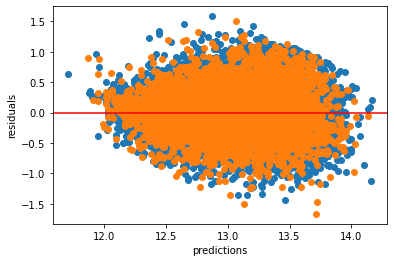

In [71]:
evaluate(y_train, trpreds, y_test, tepreds)

In [89]:
# Create a dicitonary for train and test r square and error scores
train = {'R2': 0.5314059179683832, 'RMSE': 0.34290008599015426, 'MAE': 0.2629127696803214}
test = {'R2': 0.5265739947104835, 'RMSE': 0.3432302596773054, 'MAE': 0.2629127696803214}

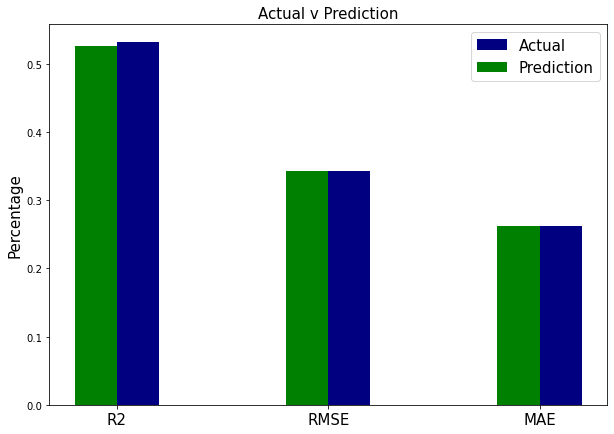

In [98]:
# Define X for x tick
X = np.arange(len(train))

# Initiate figure
fig, ax = plt.subplots(figsize= (10,7))

# Create a bar plot based on dictionaries
ax.bar(X+0.1, train.values(), width=0.2, color='Navy')
ax.bar(X-0.1, test.values(), width=0.2, color='g')

# Set axis and titles
ax.legend(('Actual','Prediction'), fontsize=15)
plt.xticks(X, train.keys(), fontsize =15)
plt.title("Actual v Prediction", fontsize=15)
plt.ylabel("Percentage", fontsize = 15)
plt.show()

fig.savefig('Project2DataVisualization/bar_r2_err.png')

No Overfit. Model is valid

## Independent Variables
 - We found the model is valid.
 - The most significant contributing independent variables are:
  1. log_bed_sqft
  2. condition
  3. lat

## Analysis 1: log_bed_sqft
### Interpreting Coefficient of Variable
 - Shows the significance of the log_bed_sqft variable.

In [72]:
log_bs_coeff = 0.7614
new_coef = round(((1.10 ** log_bs_coeff) -1) * 100, 2)
print("As the ratio of bedrooms to square-footage living space increases by 10% the homes sale price by about {}%".format(new_coef))

As the ratio of bedrooms to square-footage living space increases by 10% the homes sale price by about 7.53%


In [73]:
backup_bedroom = df.copy()
backup_bedroom['log_price'] = np.log(backup_bedroom['price'])
backup_bedroom['log_bed_sqft'] = np.log(backup_bedroom['Bedrooms_SQFT'])

### Scatter Plot
 - The data shows a clear connection between the increase in bedrooms as the square footage of living space increases.
 - This increase in bedrooms ultimately increases the sale price of the home.

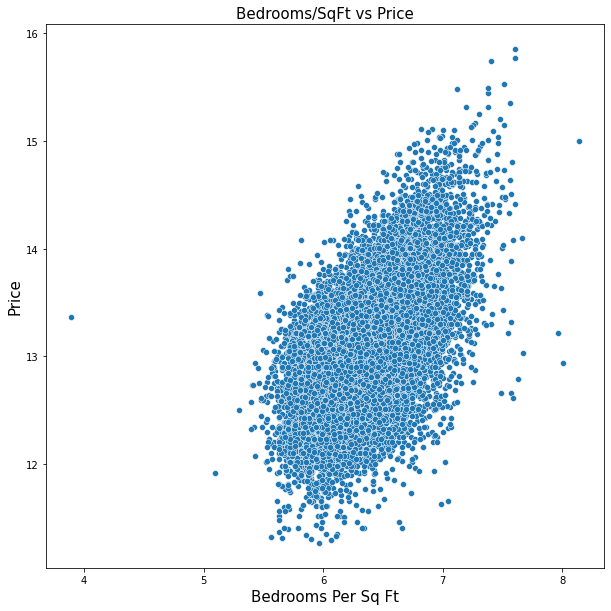

In [99]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=backup_bedroom, x="log_bed_sqft", y="log_price")
plt.title("Bedrooms/SqFt vs Price", fontsize = 15)
plt.xlabel("Bedrooms Per Sq Ft", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
fig.savefig('Project2DataVisualization/Scat_log_bed_sqft.png')

## Analysis 2: Condition

The coefficient of the condition in our final model is 0.0524. However, we need to go through the process of clearing the effect of log, since the our target variable is normalized through log transformation.

In [91]:
# coefficient of the condition in our scaled final model.
condition_coeff = 0.0524
# increase in value (percent) by increasing the condition by 1 rank
better_condition = round((np.exp(condition_coeff) - 1)*100, 2)
print("The effect of 1 rank better condition of the house will increase home sale price by about ${}".format(better_condition))

The effect of 1 rank better condition of the house will increase home sale price by about $5.38


#### We will go through the process of checking the effect of condition in our original data using box plot.

In [76]:
# Check original dataframe
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Bath_SQFT',
       'Bedrooms_SQFT', 'BathroomsPerBedrooms', 'Perc_Liv_Space_Above',
       'LS_Per_FL', 'LivSp_Per_Lot'],
      dtype='object')

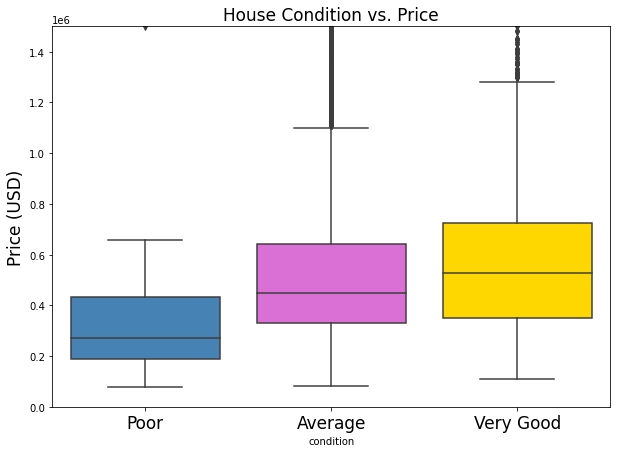

In [96]:
# Initiate the figure
fig, ax = plt.subplots(figsize=(10, 7))

# Create the box plot with seaborn
# X axis is rank of condition in increasing order
# Y axis is price
sns.boxplot(x = df['condition'], y=df['price'], order=['Poor', 'Average', 'Very Good'])

# Specify the color of each box for better visual
ax.artists[0].set_facecolor('steelblue')
ax.artists[1].set_facecolor('orchid')
ax.artists[2].set_facecolor('gold')

# Set the title and y label
plt.title("House Condition vs. Price", fontsize= 17)
plt.ylabel("Price (USD)", fontsize=17)
plt.xticks(fontsize = 17)

# Set limit of y axis for better comparison
plt.ylim(0,1500000)

fig.savefig('Project2DataVisualization/Condition_Price.png')

According to the boxplot, the general tendancy of the Sale Price goes up as the condition increases from Poor to Very Good.

## Analysis 3: lat

In [83]:
lat_backup_df = df.copy()
lat_backup_df['log_price'] = np.log(lat_backup_df['price'])

In [97]:
import plotly.express as px
# Explore relationship between location and price
fig = px.scatter_mapbox(data_frame = lat_backup_df, # df name
                        lat='lat', # name of latitude column
                        lon='long', # name of longitude column
                        color='log_price', # name of column to use for the color
                        zoom=8)
fig.update_layout(mapbox_style="open-street-map")
fig.show()
fig.savefig('Project2DataVisualization/lat_visualization2.png')

AttributeError: 'Figure' object has no attribute 'savefig'

In [85]:
#View Final Model
fit_n_run(xtr=train_scaled, ytr=y_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2734.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:18   Log-Likelihood:                -5045.6
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14466   BIC:                         1.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0346      0.003   4571.994      0.0

array([13.85262853, 13.10846432, 12.4645968 , ..., 12.92288661,
       12.19287127, 13.46400025])

In [86]:
# Slope1 (coefficient of log_bed_sqft)
m1 = 0.2356
#Slope2 (lat)
m2 = 0.2093
#slope3 (condition)
m3 = 0.0524
# Intercept (coefficient of Intercept)
b = 13.0346


print(f"""
Our final linear regression model found a y-intercept of ${round(np.exp(b), 2)}.
Increasing amount of bedrooms will increase the price by ${round(((1.10 ** m1) -1) * 100, 2)} per square foot.
For every degree increase in latitude, the price increases by $ {round((np.exp(m2) - 1)*100, 2)}.
If you increase the condition of the home via our converted scale, the price increases by $ {round((np.exp(m3) - 1)*100, 2)}.
 
""")




Our final linear regression model found a y-intercept of $457988.8.
Increasing amount of bedrooms will increase the price by $2.27 per square foot.
For every degree increase in latitude, the price increases by $ 23.28.
If you increase the condition of the home via our converted scale, the price increases by $ 5.38.
 

